# Data Generation for the Rummy Pool

In [1]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl



numbers_of_players_in_pool = int(input('How many players do you want to have in the pool: '))
bet_multiplier_options = [0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200]
min_amount = [4, 8, 20, 40, 80, 160, 240, 400, 800, 1600, 3200, 6400, 10000, 16000]
bet_min = dict(zip(bet_multiplier_options, min_amount))
print(bet_min)

bet_multiplier_input = float(input("How much do you want the bet amount multiplier to be?\nChoose from the options - (0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200): "))
print(f"You have chosen the bet amount multiplier to be: {bet_multiplier_input}")

for key in bet_min.keys():
    if key == bet_multiplier_input:
        min_amt_required = float(bet_min[key])
        print("Minimum amount is:", min_amt_required)
        print(type(min_amt_required))
    else:
        continue
        print("Sorry, you have chosen a wrong bet amount multiplier, please try again by chosing one from the options mentioned here (0.05, 0.1, 0.25, 0.5, 1, 2, 3,5, 10, 20, 40, 80, 125, 200): ")

totalPlayers = {}
for i in range(numbers_of_players_in_pool):
    x = ''.join([random.choice(string.ascii_uppercase) for k in range(4)]).title()
    y = round(random.uniform(min_amt_required, (min_amt_required + 30)), 3)
    totalPlayers[x] = y

Sum = sum(totalPlayers.values())
print(f"The total amount involved in this pool is: {Sum}")
total_players_df = pd.DataFrame(totalPlayers.items(), columns=['Name', 'Balance in Rupees'])
print("The below table shows all the players in the pool along with their account balances.")
print(total_players_df)

total_amount_credited_to_app = 0
percentage_deduction = 15 / 100



matches_data = []

def matches():
    global total_amount_credited_to_app
    global matches_data

    eligible_players = {k: v for k, v in totalPlayers.items() if v >= min_amt_required}

    if len(eligible_players) < 2:
        print("Insufficient eligible players for a match.")
        return

    p1 = random.choice(list(eligible_players.items()))
    del eligible_players[p1[0]]
    p2 = random.choice(list(eligible_players.items()))

    match_data = {
        'Match Number':'',
        'Player 1': p1[0],
        'Player 2': p2[0],
        'Loser': '',
        'Winner': '',
        'Points Lost by Loser': '',
        'Amount Lost by Loser': '',
        'Amount Remaining for Loser': '',
        'Amount to be Credited to App': '',
        'Total Amount Earned by App': '',
        'Amount Won by Winner': '',
        'Amount Remaining for Winner': ''
    }
    
    match_data['Match Number'] = len(matches_data) + 1
    
    remaining_balances = totalPlayers.copy()
    for player, balance in remaining_balances.items():
        if player == match_data['Loser']:
            match_data[player] = totalPlayers[player] - (random.randint(2, 80) * bet_multiplier_input)
        elif player == match_data['Winner']:
            match_data[player] = totalPlayers[player] + (
                        totalPlayers[match_data['Loser']] * bet_multiplier_input * (100 - percentage_deduction) / 100)
        else:
            match_data[player] = balance
    
    for players, remaining_bal in totalPlayers.items():
        if players == match_data['Loser']:
            match_data[players] = amount_remaining_for_loser
        elif players == match_data['Winner']:
            match_data[players] == amount_remaining_for_winner
        else:
            match_data[players] == remaining_bal
    
    match_data['Loser'] = p1[0] if random.choice([p1, p2]) == p2 else p2[0]
    match_data['Winner'] = p1[0] if match_data['Loser'] == p2[0] else p2[0]

    points_lost = random.choice(range(2, 80))
    amount_deducted_from_loser = round(points_lost * bet_multiplier_input, 3)
    amount_remaining_for_loser = round(totalPlayers[match_data['Loser']] - amount_deducted_from_loser, 3)
    amount_credited_to_app = round(amount_deducted_from_loser * percentage_deduction, 3)
    total_amount_credited_to_app += amount_credited_to_app

    match_data['Points Lost by Loser'] = points_lost
    match_data['Amount Lost by Loser'] = amount_deducted_from_loser
    match_data['Amount Remaining for Loser'] = amount_remaining_for_loser
    match_data['Amount to be Credited to App'] = amount_credited_to_app
    match_data['Total Amount Earned by App'] = total_amount_credited_to_app

    amount_earnt_by_winner = round(amount_deducted_from_loser - amount_credited_to_app, 3)
    amount_remaining_for_winner = round(totalPlayers[match_data['Winner']] + amount_earnt_by_winner, 3)

    match_data['Amount Won by Winner'] = amount_earnt_by_winner
    match_data['Amount Remaining for Winner'] = amount_remaining_for_winner

    totalPlayers[match_data['Loser']] = amount_remaining_for_loser
    totalPlayers[match_data['Winner']] = amount_remaining_for_winner
    
    
    print(f"In this match we have : \n {p1} v/s {p2}")
    print(f'Where player 1 is : {p1}')
    print(f'and player 2 is : {p2}')
    
    print (f"The Winner is : {match_data['Winner']} ")
    print(f"And the loser is : {match_data['Loser']}  ")
    
    print(f"Points lost by loser - {match_data['Loser']}  is : \n {points_lost}")
    print(f"Amount lost by loser - {match_data['Loser']}  is : \n {amount_deducted_from_loser}")
    print (f"Amount remaining in the loser {match_data['Loser']}'s account is : \n {amount_remaining_for_loser}")
    (f"Amount won by winner {match_data['Winner']} is : \n {amount_earnt_by_winner}")
    print(f"Amount remaining in the winner {match_data['Winner']}'s account is : \n {amount_remaining_for_winner}")
    
    print(f"Amount to be credited to app is : \n {amount_credited_to_app}")
    print(f"Total amount earnt by app is : \n {total_amount_credited_to_app}")
    
    closing_balance_of_match = pd.DataFrame(totalPlayers.items(), columns=['Name', "Balance"])
    closing_balance_of_match.loc[closing_balance_of_match['Name'] == match_data['Loser'], 'Balance'] = amount_remaining_for_loser
    closing_balance_of_match.loc[closing_balance_of_match['Name'] == match_data['Winner'], 'Balance'] = amount_remaining_for_winner
    print(f"The closing balance of this match is \n {closing_balance_of_match}")

   
    matches_data.append(match_data)

counter = len(totalPlayers)
print(counter)
match = 0

while counter > 1:
    matches()
    match += 1
    print(f"Match {match} concluded")
    print("-" * 120)
    counter = sum(1 for amount in totalPlayers.values() if amount >= min_amt_required)

matches_df = pd.DataFrame(matches_data)



How many players do you want to have in the pool: 4
{0.05: 4, 0.1: 8, 0.25: 20, 0.5: 40, 1: 80, 2: 160, 3: 240, 5: 400, 10: 800, 20: 1600, 40: 3200, 80: 6400, 125: 10000, 200: 16000}
How much do you want the bet amount multiplier to be?
Choose from the options - (0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200): .05
You have chosen the bet amount multiplier to be: 0.05
Minimum amount is: 4.0
<class 'float'>
The total amount involved in this pool is: 74.31
The below table shows all the players in the pool along with their account balances.
   Name  Balance in Rupees
0  Ofzj             17.612
1  Gfvb              4.563
2  Vqwz             24.525
3  Kbkc             27.610
4
In this match we have : 
 ('Gfvb', 4.563) v/s ('Kbkc', 27.61)
Where player 1 is : ('Gfvb', 4.563)
and player 2 is : ('Kbkc', 27.61)
The Winner is : Kbkc 
And the loser is : Gfvb  
Points lost by loser - Gfvb  is : 
 47
Amount lost by loser - Gfvb  is : 
 2.35
Amount remaining in the loser Gfvb's account is

In [2]:
matches_df

,Match Number,Player 1,Player 2,Loser,Winner,Points Lost by Loser,Amount Lost by Loser,Amount Remaining for Loser,Amount to be Credited to App,Total Amount Earned by App,Amount Won by Winner,Amount Remaining for Winner,Ofzj,Gfvb,Vqwz,Kbkc
0,1,Gfvb,Kbkc,Gfvb,Kbkc,47,2.35,2.213,0.352,0.352,1.998,29.608,17.612,4.563,24.525,27.610
1,2,Ofzj,Kbkc,Kbkc,Ofzj,33,1.65,27.958,0.247,0.599,1.403,19.015,17.612,2.213,24.525,29.608
2,3,Ofzj,Kbkc,Ofzj,Kbkc,72,3.60,15.415,0.540,1.139,3.060,31.018,19.015,2.213,24.525,27.958
3,4,Kbkc,Ofzj,Ofzj,Kbkc,42,2.10,13.315,0.315,1.454,1.785,32.803,15.415,2.213,24.525,31.018
4,5,Kbkc,Ofzj,Ofzj,Kbkc,71,3.55,9.765,0.532,1.986,3.018,35.821,13.315,2.213,24.525,32.803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Kbkc,Vqwz,Kbkc,Vqwz,20,1.00,7.535,0.150,44.716,0.850,16.853,2.993,2.213,16.003,8.535
143,144,Vqwz,Kbkc,Kbkc,Vqwz,62,3.10,4.435,0.465,45.181,2.635,19.488,2.993,2.213,16.853,7.535
144,145,Vqwz,Kbkc,Vqwz,Kbkc,79,3.95,15.538,0.593,45.774,3.357,7.792,2.993,2.213,19.488,4.435
145,146,Kbkc,Vqwz,Kbkc,Vqwz,45,2.25,5.542,0.337,46.111,1.913,17.451,2.993,2.213,15.538,7.792


In [3]:
matches_df.to_excel('Rummy.xlsx', index=False, engine='openpyxl')

In [4]:
App = matches_df['Total Amount Earned by App']
col_names = matches_df.columns

### Visualization of player's and app's flow of balances

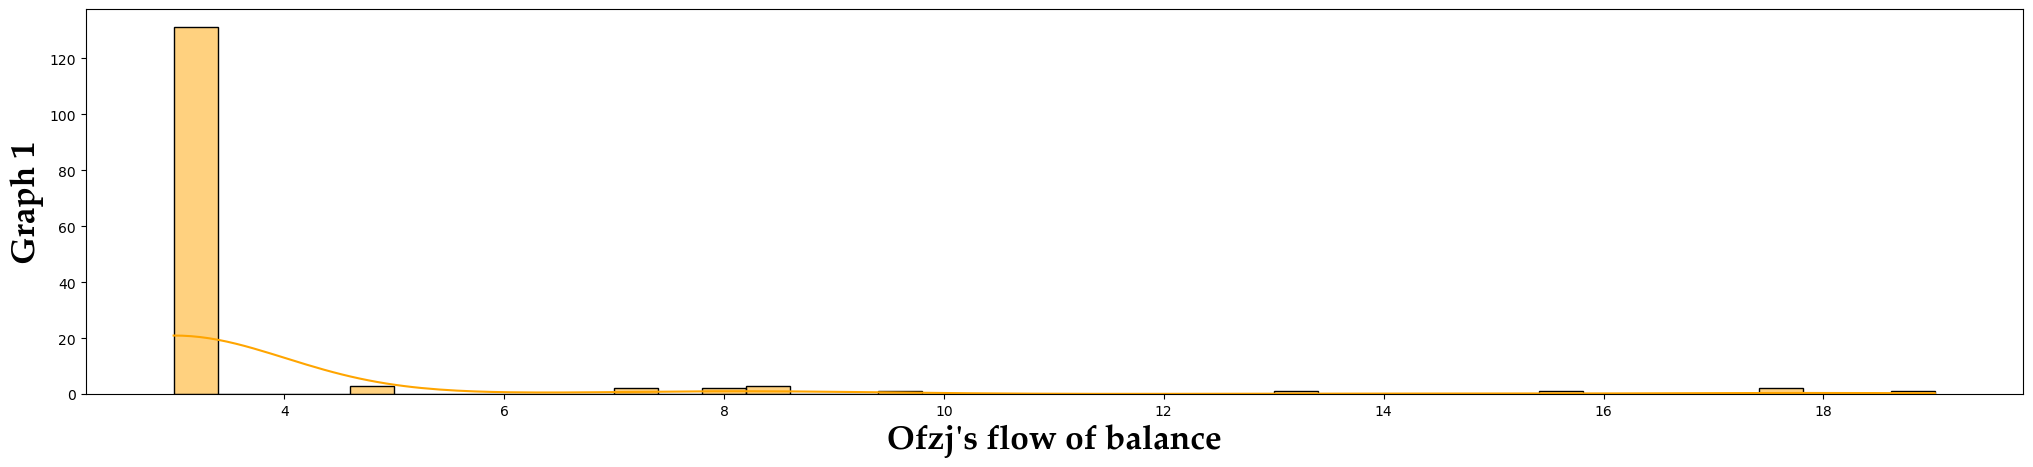

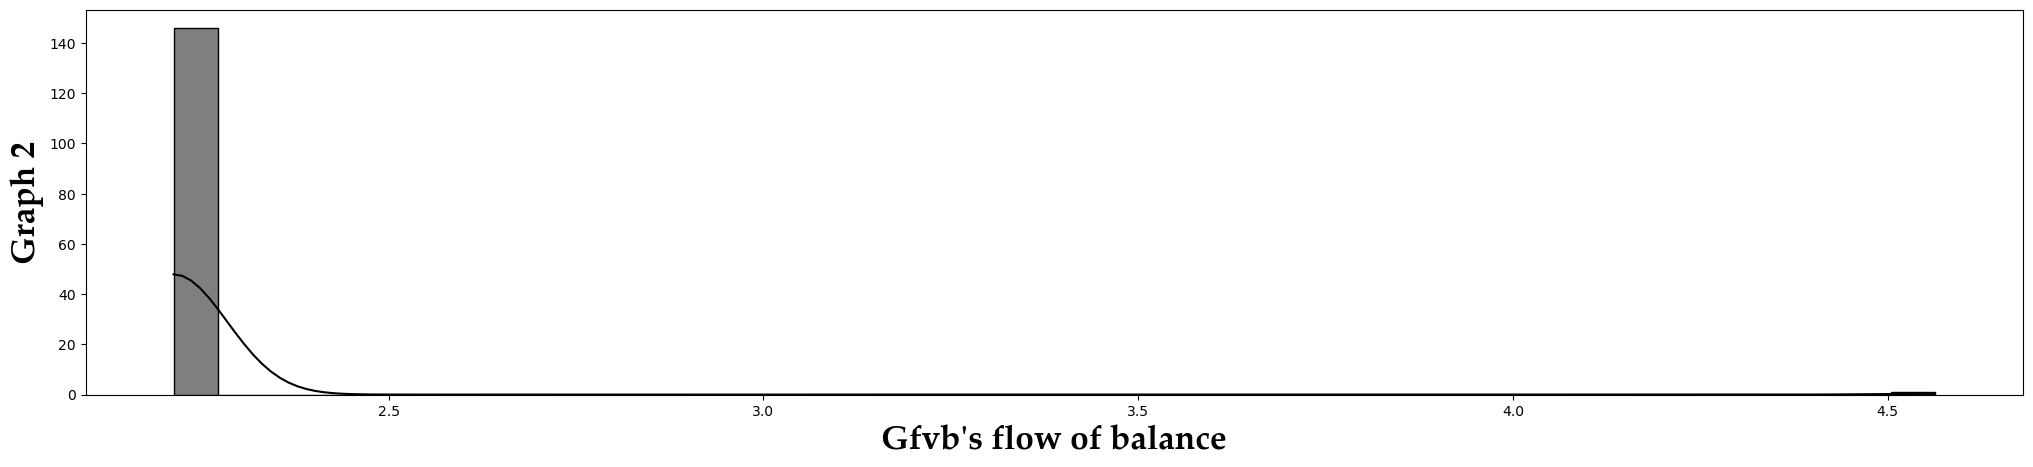

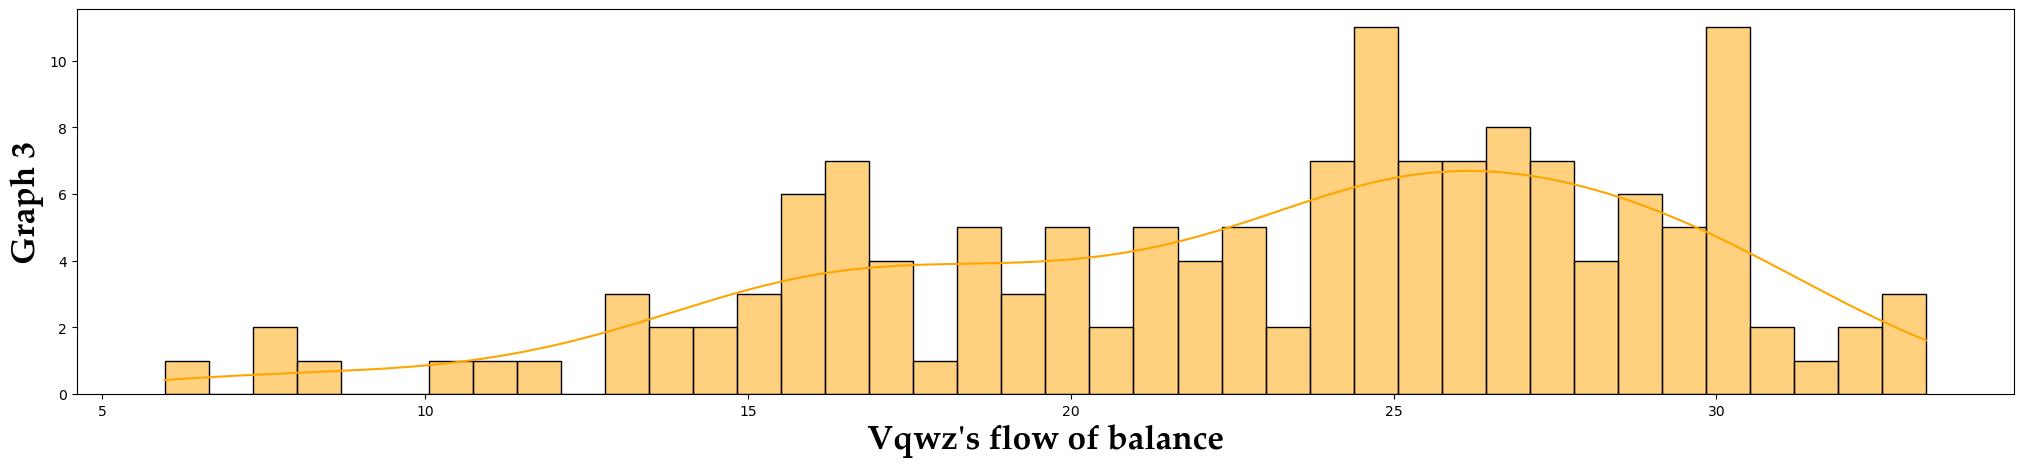

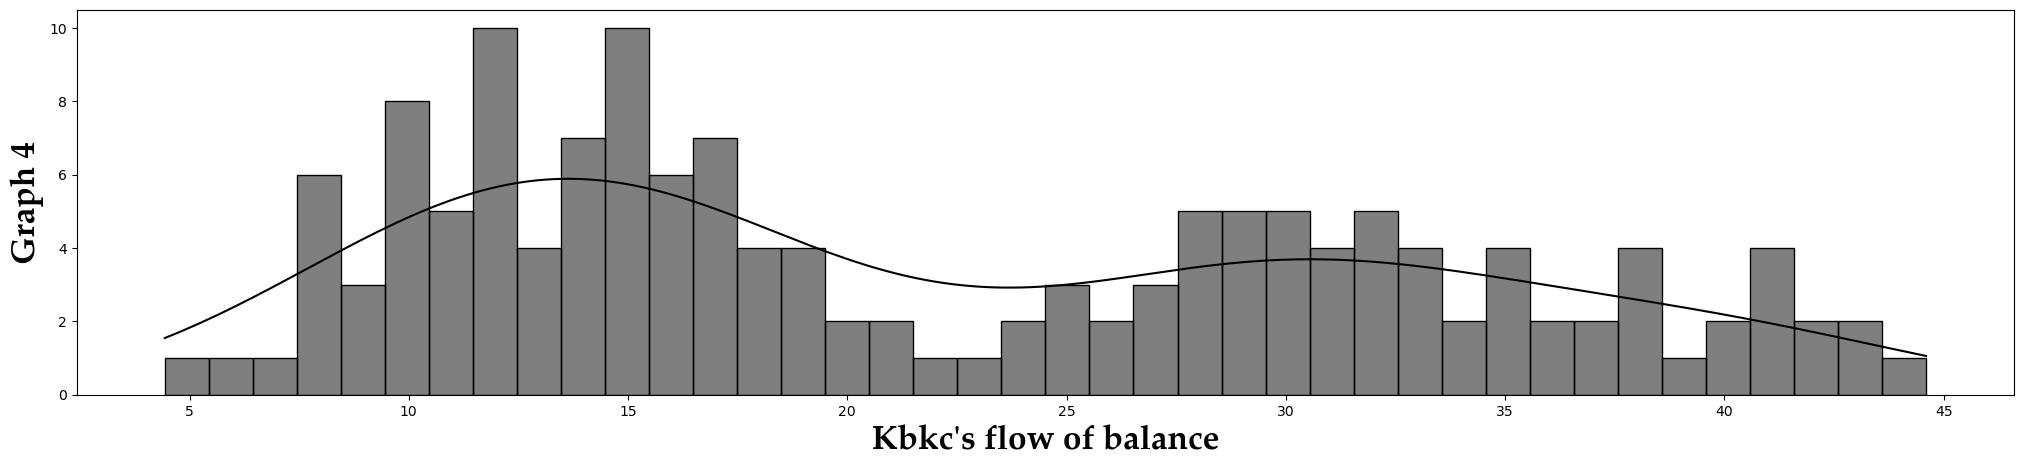

In [5]:
font = {'size':24, 'family':'Palatino Linotype', 'weight':'bold'}
for i in range(numbers_of_players_in_pool):
    plt.figure(figsize=(25,5))
    plott = sns.histplot(matches_df.iloc[:,12+i], kde=True, bins=40, color= random.choice(['r', 'g','b','yellow','black','orange']))
    plt.xlabel(f"{col_names[12+i]}'s flow of balance", fontdict=font)
    plt.ylabel(f"Graph {i+1}", fontdict=font)
    plt.show()
    i += 1
#     if i > len(matches_df.columns):
#         exit()

Text(0, 0.5, 'Count')

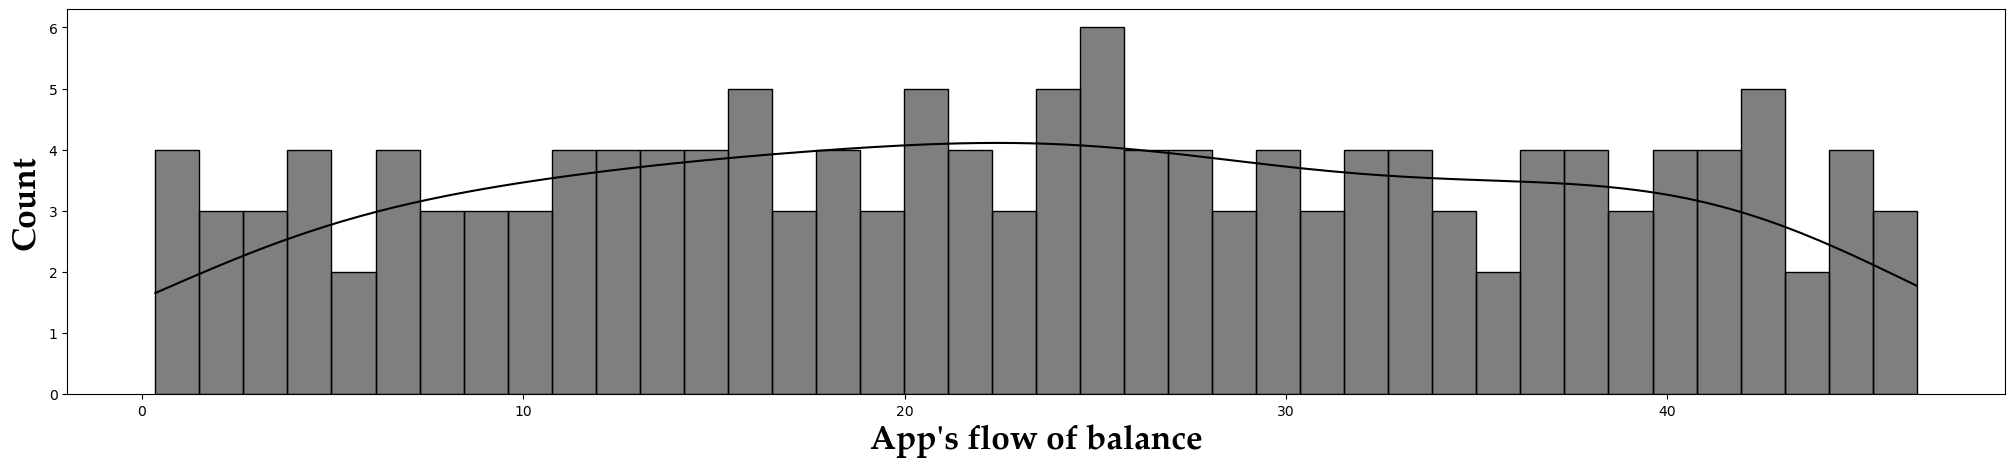

In [6]:
plt.figure(figsize=(25,5))
sns.histplot(matches_df.iloc[:,9], kde=True, bins=40, color='black')
plt.xlabel("App's flow of balance", fontdict=font)
plt.ylabel("Count", fontdict=font)

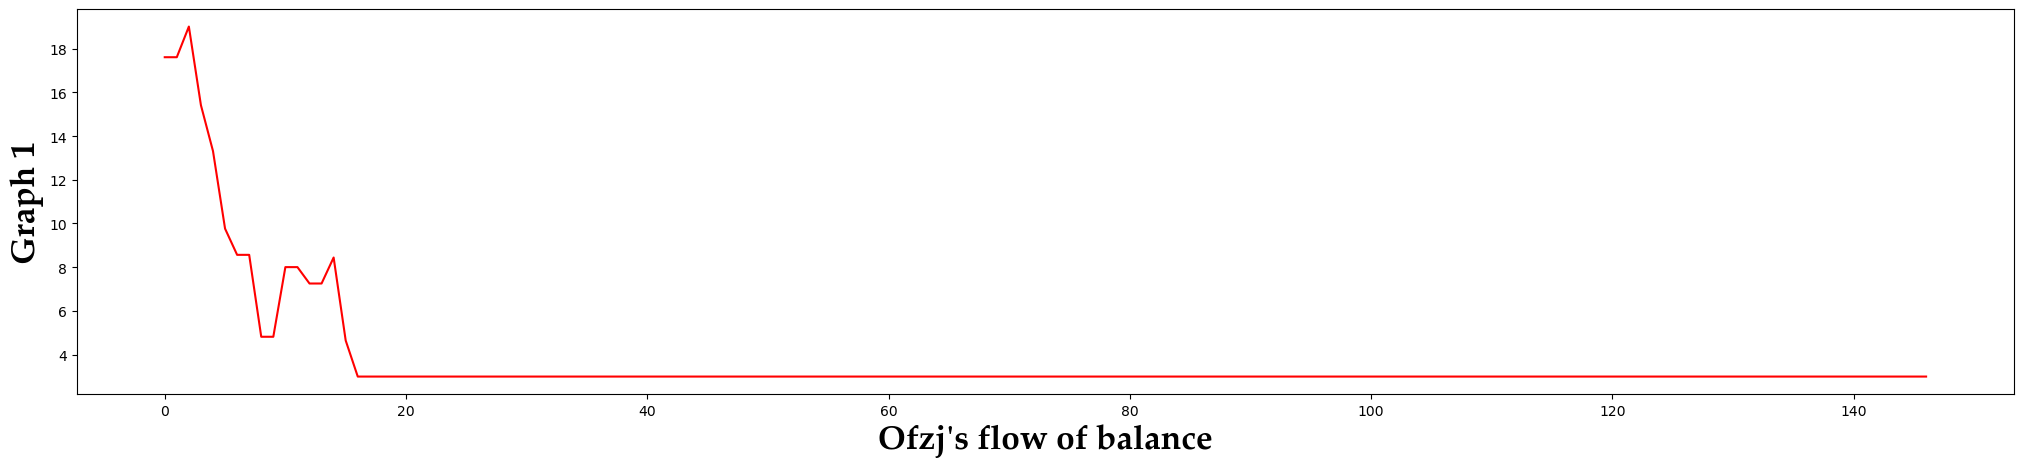

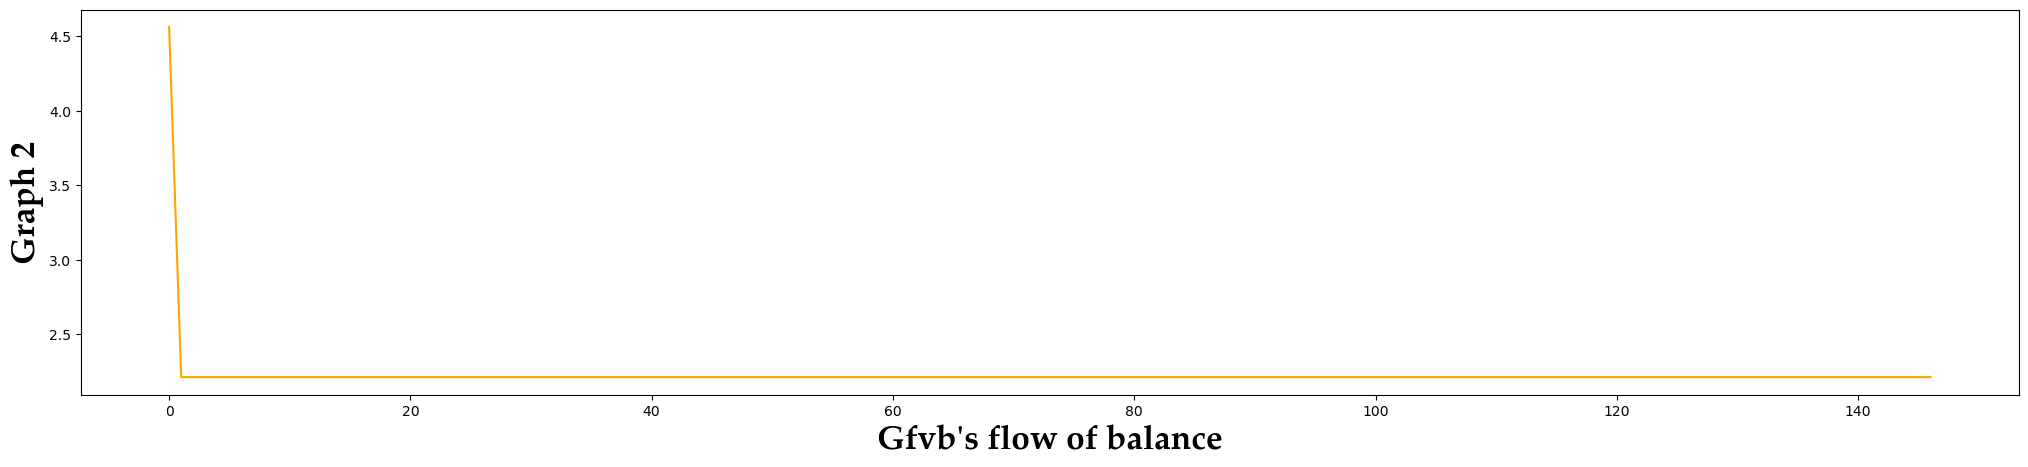

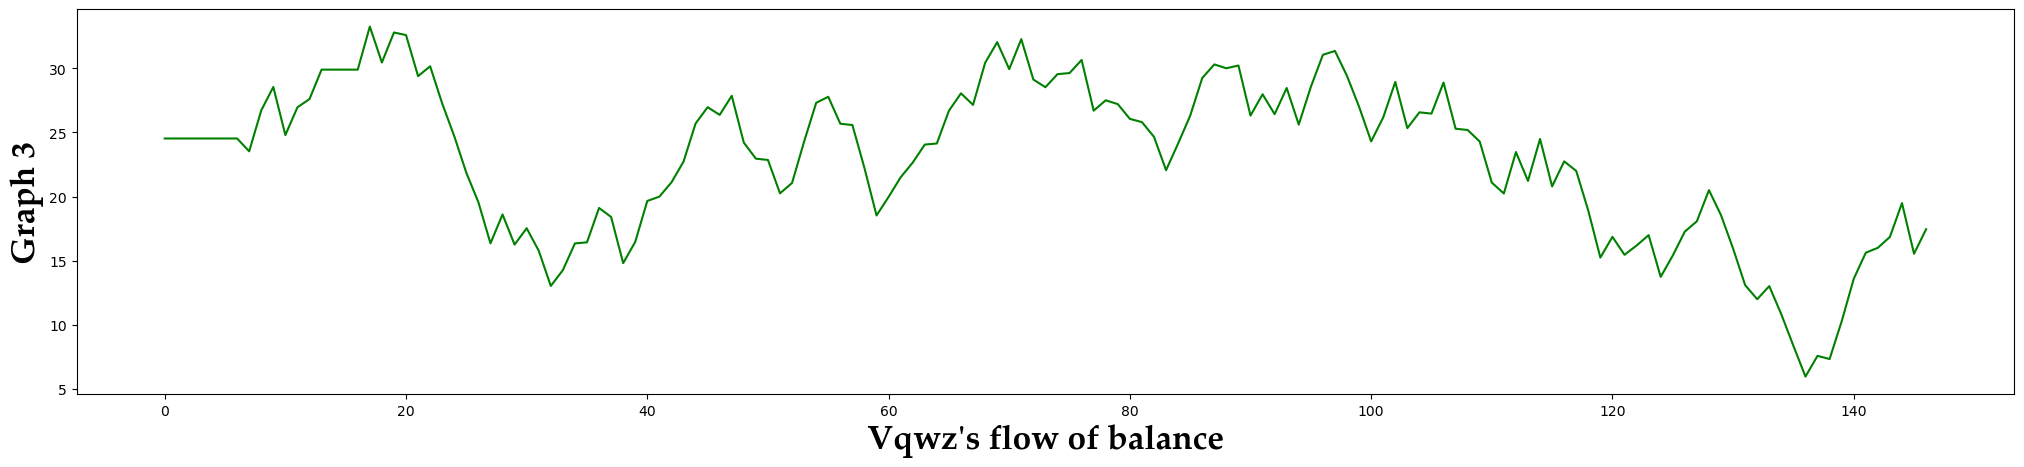

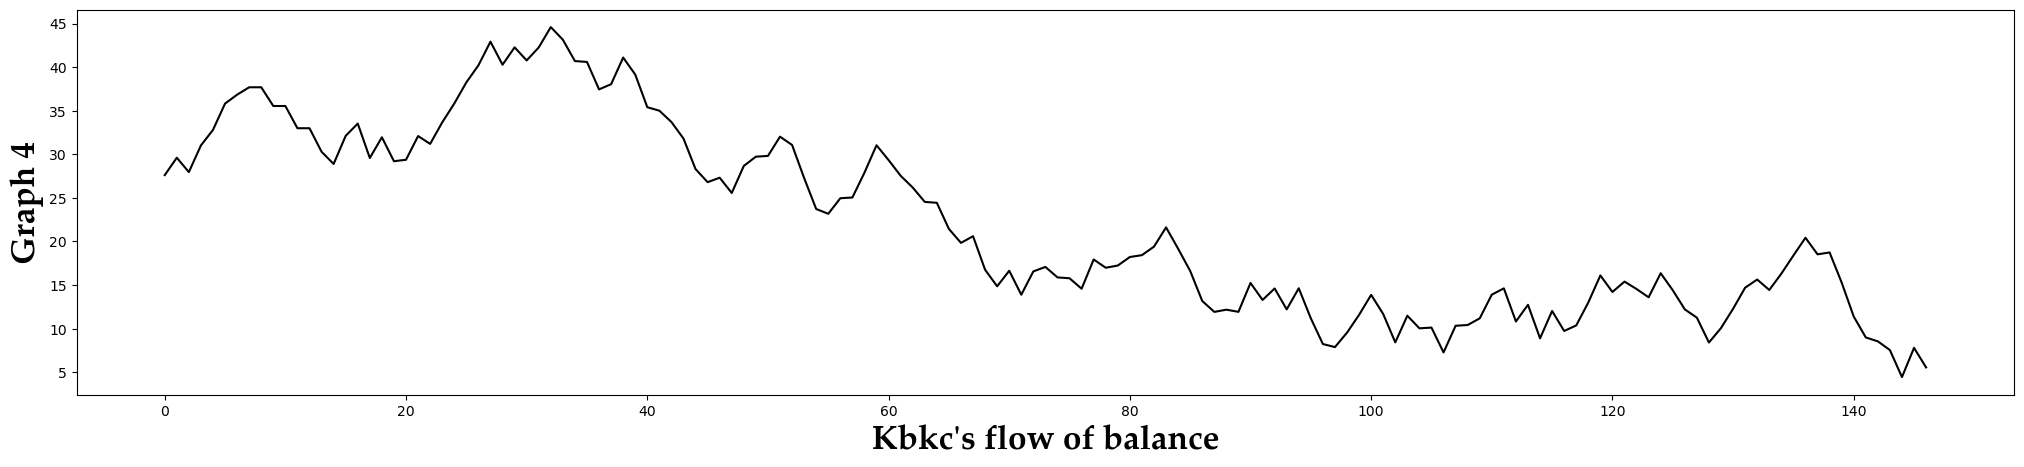

In [7]:
for i in range(numbers_of_players_in_pool):
    plt.figure(figsize=(25,5))
    matches_df.iloc[:,12+i].plot(kind='line', color= random.choice(['r','g','b','c','black','indigo','orange']))
    plt.xlabel(f"{col_names[12+i]}'s flow of balance", fontdict=font)
    plt.ylabel(f"Graph {i+1}", fontdict=font)
    plt.show()
    i += 1

Text(0, 0.5, 'Count')

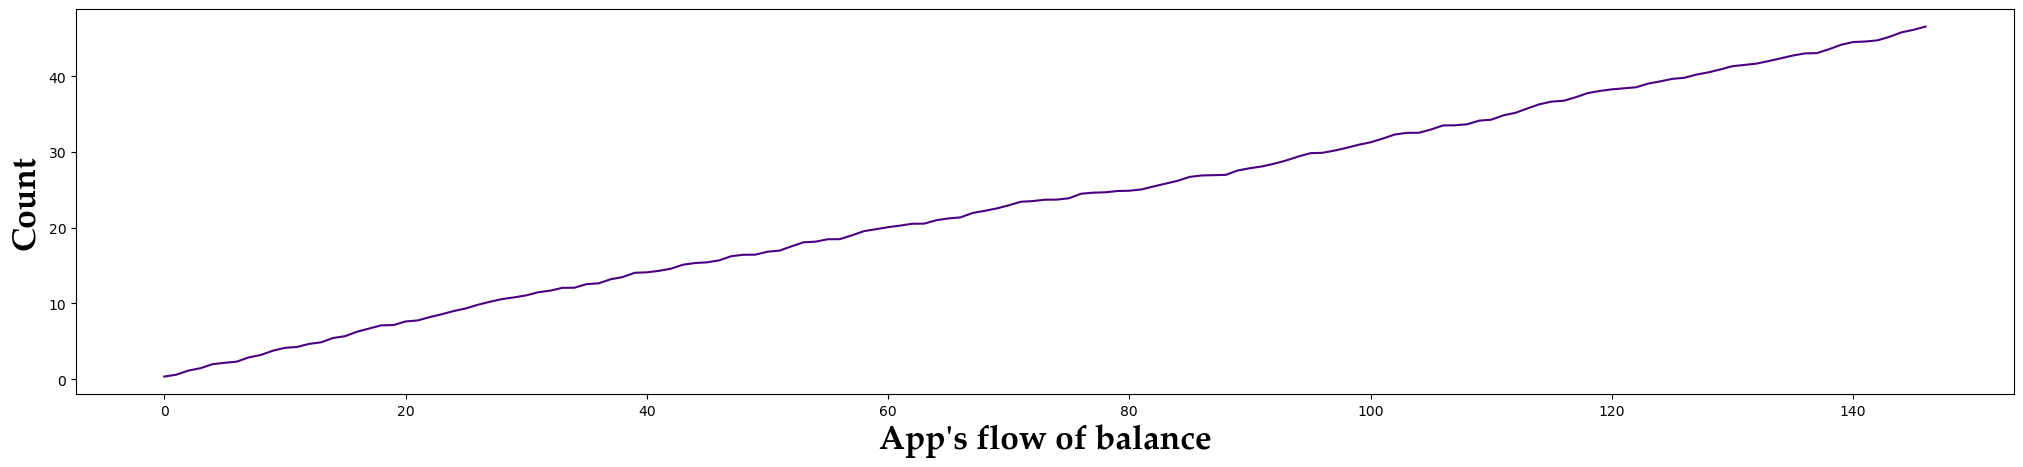

In [8]:
plt.figure(figsize=(25,5))
matches_df['Total Amount Earned by App'].plot(kind='line', color='indigo')
plt.xlabel("App's flow of balance", fontdict=font)
plt.ylabel("Count", fontdict=font)

### Linear Regression model preparation

In [9]:
predictor = matches_df.drop('Total Amount Earned by App', axis=1)

In [10]:
predictor

,Match Number,Player 1,Player 2,Loser,Winner,Points Lost by Loser,Amount Lost by Loser,Amount Remaining for Loser,Amount to be Credited to App,Amount Won by Winner,Amount Remaining for Winner,Ofzj,Gfvb,Vqwz,Kbkc
0,1,Gfvb,Kbkc,Gfvb,Kbkc,47,2.35,2.213,0.352,1.998,29.608,17.612,4.563,24.525,27.610
1,2,Ofzj,Kbkc,Kbkc,Ofzj,33,1.65,27.958,0.247,1.403,19.015,17.612,2.213,24.525,29.608
2,3,Ofzj,Kbkc,Ofzj,Kbkc,72,3.60,15.415,0.540,3.060,31.018,19.015,2.213,24.525,27.958
3,4,Kbkc,Ofzj,Ofzj,Kbkc,42,2.10,13.315,0.315,1.785,32.803,15.415,2.213,24.525,31.018
4,5,Kbkc,Ofzj,Ofzj,Kbkc,71,3.55,9.765,0.532,3.018,35.821,13.315,2.213,24.525,32.803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Kbkc,Vqwz,Kbkc,Vqwz,20,1.00,7.535,0.150,0.850,16.853,2.993,2.213,16.003,8.535
143,144,Vqwz,Kbkc,Kbkc,Vqwz,62,3.10,4.435,0.465,2.635,19.488,2.993,2.213,16.853,7.535
144,145,Vqwz,Kbkc,Vqwz,Kbkc,79,3.95,15.538,0.593,3.357,7.792,2.993,2.213,19.488,4.435
145,146,Kbkc,Vqwz,Kbkc,Vqwz,45,2.25,5.542,0.337,1.913,17.451,2.993,2.213,15.538,7.792


In [11]:
target = pd.DataFrame(matches_df['Total Amount Earned by App'])
target

,Total Amount Earned by App
0,0.352
1,0.599
2,1.139
3,1.454
4,1.986
...,...
142,44.716
143,45.181
144,45.774
145,46.111


In [12]:
cat_cols = [col for col in predictor.columns.values if predictor[col].dtype == 'object']
predictor_cat = predictor[cat_cols]
predictor_cat

,Player 1,Player 2,Loser,Winner
0,Gfvb,Kbkc,Gfvb,Kbkc
1,Ofzj,Kbkc,Kbkc,Ofzj
2,Ofzj,Kbkc,Ofzj,Kbkc
3,Kbkc,Ofzj,Ofzj,Kbkc
4,Kbkc,Ofzj,Ofzj,Kbkc
...,...,...,...,...
142,Kbkc,Vqwz,Kbkc,Vqwz
143,Vqwz,Kbkc,Kbkc,Vqwz
144,Vqwz,Kbkc,Vqwz,Kbkc
145,Kbkc,Vqwz,Kbkc,Vqwz


In [13]:
cat_dummy = pd.get_dummies(predictor_cat, drop_first=True)
cat_dummy

,Player 1_Kbkc,Player 1_Ofzj,Player 1_Vqwz,Player 2_Ofzj,Player 2_Vqwz,Loser_Kbkc,Loser_Ofzj,Loser_Vqwz,Winner_Ofzj,Winner_Vqwz
0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
142,1,0,0,0,1,1,0,0,0,1
143,0,0,1,0,0,1,0,0,0,1
144,0,0,1,0,0,0,0,1,0,0
145,1,0,0,0,1,1,0,0,0,1


In [14]:
predictor_num = predictor.drop(cat_cols, axis=1)
predictor_num

,Match Number,Points Lost by Loser,Amount Lost by Loser,Amount Remaining for Loser,Amount to be Credited to App,Amount Won by Winner,Amount Remaining for Winner,Ofzj,Gfvb,Vqwz,Kbkc
0,1,47,2.35,2.213,0.352,1.998,29.608,17.612,4.563,24.525,27.610
1,2,33,1.65,27.958,0.247,1.403,19.015,17.612,2.213,24.525,29.608
2,3,72,3.60,15.415,0.540,3.060,31.018,19.015,2.213,24.525,27.958
3,4,42,2.10,13.315,0.315,1.785,32.803,15.415,2.213,24.525,31.018
4,5,71,3.55,9.765,0.532,3.018,35.821,13.315,2.213,24.525,32.803
...,...,...,...,...,...,...,...,...,...,...,...
142,143,20,1.00,7.535,0.150,0.850,16.853,2.993,2.213,16.003,8.535
143,144,62,3.10,4.435,0.465,2.635,19.488,2.993,2.213,16.853,7.535
144,145,79,3.95,15.538,0.593,3.357,7.792,2.993,2.213,19.488,4.435
145,146,45,2.25,5.542,0.337,1.913,17.451,2.993,2.213,15.538,7.792


In [15]:
predictor_num['Match Number'] = predictor_num['Match Number'].astype('float64')
predictor_num['Points Lost by Loser'] = predictor_num['Points Lost by Loser'].astype('float64')

### Logarithmic Transformation to convert the target's unifrom distribution to a normal distribution

In [16]:
import numpy as np

target_log = np.log1p(target)

In [17]:
target_log

,Total Amount Earned by App
0,0.301585
1,0.469378
2,0.760338
3,0.897719
4,1.093935
...,...
142,3.822448
143,3.832568
144,3.845327
145,3.852507


<Axes: ylabel='Count'>

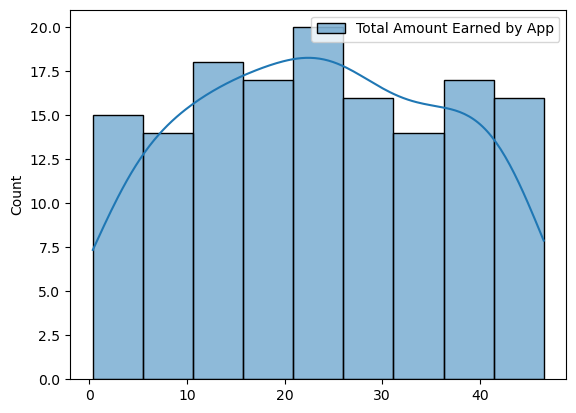

In [18]:
sns.histplot(target, kde=True)

<Axes: ylabel='Count'>

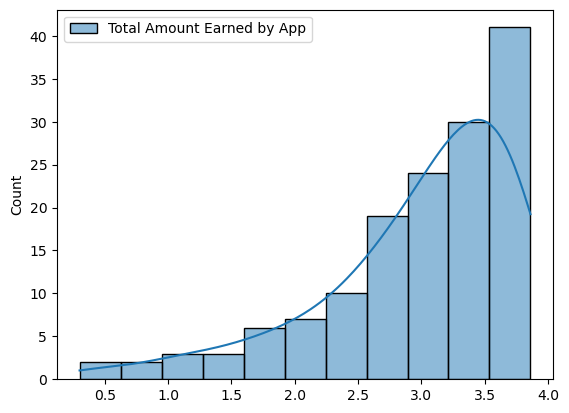

In [19]:
sns.histplot(target_log, kde=True)

In [20]:
cat_dummy.columns

Index(['Player 1_Kbkc', 'Player 1_Ofzj', 'Player 1_Vqwz', 'Player 2_Ofzj',
       'Player 2_Vqwz', 'Loser_Kbkc', 'Loser_Ofzj', 'Loser_Vqwz',
       'Winner_Ofzj', 'Winner_Vqwz'],
      dtype='object')

In [21]:
predictor_new = pd.concat([cat_dummy, predictor_num], axis =1)
predictor_new

,Player 1_Kbkc,Player 1_Ofzj,Player 1_Vqwz,Player 2_Ofzj,Player 2_Vqwz,Loser_Kbkc,Loser_Ofzj,Loser_Vqwz,Winner_Ofzj,Winner_Vqwz,...,Points Lost by Loser,Amount Lost by Loser,Amount Remaining for Loser,Amount to be Credited to App,Amount Won by Winner,Amount Remaining for Winner,Ofzj,Gfvb,Vqwz,Kbkc
0,0,0,0,0,0,0,0,0,0,0,...,47.0,2.35,2.213,0.352,1.998,29.608,17.612,4.563,24.525,27.610
1,0,1,0,0,0,1,0,0,1,0,...,33.0,1.65,27.958,0.247,1.403,19.015,17.612,2.213,24.525,29.608
2,0,1,0,0,0,0,1,0,0,0,...,72.0,3.60,15.415,0.540,3.060,31.018,19.015,2.213,24.525,27.958
3,1,0,0,1,0,0,1,0,0,0,...,42.0,2.10,13.315,0.315,1.785,32.803,15.415,2.213,24.525,31.018
4,1,0,0,1,0,0,1,0,0,0,...,71.0,3.55,9.765,0.532,3.018,35.821,13.315,2.213,24.525,32.803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,1,0,0,0,1,1,0,0,0,1,...,20.0,1.00,7.535,0.150,0.850,16.853,2.993,2.213,16.003,8.535
143,0,0,1,0,0,1,0,0,0,1,...,62.0,3.10,4.435,0.465,2.635,19.488,2.993,2.213,16.853,7.535
144,0,0,1,0,0,0,0,1,0,0,...,79.0,3.95,15.538,0.593,3.357,7.792,2.993,2.213,19.488,4.435
145,1,0,0,0,1,1,0,0,0,1,...,45.0,2.25,5.542,0.337,1.913,17.451,2.993,2.213,15.538,7.792


In [22]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(predictor_new.astype(float), target_log.astype(float), test_size=0.3, random_state=2024)

In [23]:
X_train.shape

(102, 21)

In [24]:
x_test.shape

(45, 21)

In [25]:
Y_train.shape

(102, 1)

In [26]:
y_test.shape

(45, 1)

In [27]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

model = lin.fit(X_train, Y_train)

In [28]:
import statsmodels.api as sm

#X_train = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_train).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Total Amount Earned by App   R-squared:                       0.982
Model:                                    OLS   Adj. R-squared:                  0.979
Method:                         Least Squares   F-statistic:                     310.5
Date:                        Thu, 16 May 2024   Prob (F-statistic):           4.38e-68
Time:                                03:15:14   Log-Likelihood:                 82.993
No. Observations:                         102   AIC:                            -134.0
Df Residuals:                              86   BIC:                            -91.99
Df Model:                                  15                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Player 1_Kbkc                    0.5563      0.760      0.732      0.466      -0.955       2.067
Player 1_Ofzj                    1.0903      0.657      1.660      0.101      -0.215       2.396
Player 1_Vqwz                    0.6412      0.700      0.917      0.362      -0.750       2.032
Player 2_Ofzj                    0.4163      0.456      0.913      0.364      -0.490       1.323
Player 2_Vqwz                    0.0817      0.183      0.446      0.657      -0.283       0.446
Loser_Kbkc                       0.5691      0.758      0.750      0.455      -0.939       2.077
Loser_Ofzj                       1.0871      0.661      1.645      0.104      -0.227       2.401
Loser_Vqwz                       0.6316      0.697      0.907      0.367      -0.753       2.016
Winner_Ofzj                      0.4195      0.457      0.919      0.361      -0.488       1.327
Winner_Vqwz                      0.0913      0.184      0.495      0.622      -0.275       0.458
Match Number                     0.0086      0.011      0.807      0.422      -0.013       0.030
Points Lost by Loser             0.6973      0.676      1.032      0.305      -0.646       2.041
Amount Lost by Loser             0.0349      0.034      1.032      0.305      -0.032       0.102
Amount Remaining for Loser       0.0370      0.024      1.522      0.132      -0.011       0.085
Amount to be Credited to App    20.0134     19.396      1.032      0.305     -18.545      58.572
Amount Won by Winner           -19.9785     19.362     -1.032      0.305     -58.470      18.513
Amount Remaining for Winner      0.0352      0.024      1.461      0.148      -0.013       0.083
Ofzj                            -0.1571      0.038     -4.179      0.000      -0.232      -0.082
Gfvb                             0.9635      0.540      1.785      0.078      -0.109       2.036
Vqwz                            -0.0428      0.040     -1.068      0.289      -0.122       0.037
Kbkc                            -0.0505      0.042     -1.210      0.229      -0.133       0.032
==============================================================================
Omnibus:                       70.908   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.659
Skew:                          -2.323   Prob(JB):                     9.83e-83
Kurtosis:                      11.202   Cond. No.                     3.01e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-31. This might indicate that there are
strong multicolli

In [30]:
y_pred = model.predict(x_test)

In [31]:
y_pred

35     2.560833
17     2.430065
34     2.591021
93     3.360097
37     2.553426
76     3.197201
30     2.488024
87     3.338410
129    3.782558
56     2.895486
117    3.651225
78     3.199129
14     1.563579
21     2.490985
133    3.784611
51     2.800026
124    3.685226
82     3.198235
98     3.458480
105    3.506338
58     2.867768
142    3.955225
67     3.061640
46     2.808942
71     3.117182
10     1.566600
24     2.423660
16     2.425080
125    3.726013
72     3.139265
15     1.972747
120    3.655648
44     2.765024
70     3.087078
6      1.410144
137    3.777128
49     2.777611
79     3.180167
131    3.766699
9      1.737678
19     2.469184
32     2.520720
25     2.431934
85     3.243136
38     2.603070
dtype: float64

In [32]:
pd.set_option('display.max_rows',150)

In [33]:
matches_df.isnull().sum().head(112)

Match Number                    0
Player 1                        0
Player 2                        0
Loser                           0
Winner                          0
Points Lost by Loser            0
Amount Lost by Loser            0
Amount Remaining for Loser      0
Amount to be Credited to App    0
Total Amount Earned by App      0
Amount Won by Winner            0
Amount Remaining for Winner     0
Ofzj                            0
Gfvb                            0
Vqwz                            0
Kbkc                            0
dtype: int64

In [34]:
new = pd.concat([predictor_num,target], axis=1)

In [35]:
new

,Match Number,Points Lost by Loser,Amount Lost by Loser,Amount Remaining for Loser,Amount to be Credited to App,Amount Won by Winner,Amount Remaining for Winner,Ofzj,Gfvb,Vqwz,Kbkc,Total Amount Earned by App
0,1.0,47.0,2.35,2.213,0.352,1.998,29.608,17.612,4.563,24.525,27.610,0.352
1,2.0,33.0,1.65,27.958,0.247,1.403,19.015,17.612,2.213,24.525,29.608,0.599
2,3.0,72.0,3.60,15.415,0.540,3.060,31.018,19.015,2.213,24.525,27.958,1.139
3,4.0,42.0,2.10,13.315,0.315,1.785,32.803,15.415,2.213,24.525,31.018,1.454
4,5.0,71.0,3.55,9.765,0.532,3.018,35.821,13.315,2.213,24.525,32.803,1.986
5,6.0,24.0,1.20,8.565,0.180,1.020,36.841,9.765,2.213,24.525,35.821,2.166
6,7.0,20.0,1.00,23.525,0.150,0.850,37.691,8.565,2.213,24.525,36.841,2.316
7,8.0,75.0,3.75,4.815,0.562,3.188,26.713,8.565,2.213,23.525,37.691,2.878
8,9.0,43.0,2.15,35.541,0.322,1.828,28.541,4.815,2.213,26.713,37.691,3.200
9,10.0,75.0,3.75,24.791,0.562,3.188,8.003,4.815,2.213,28.541,35.541,3.762


In [36]:
new.columns

Index(['Match Number', 'Points Lost by Loser', 'Amount Lost by Loser',
       'Amount Remaining for Loser', 'Amount to be Credited to App',
       'Amount Won by Winner', 'Amount Remaining for Winner', 'Ofzj', 'Gfvb',
       'Vqwz', 'Kbkc', 'Total Amount Earned by App'],
      dtype='object')

In [37]:
new_1 = new.iloc[:,7:]

In [38]:
new_1

,Ofzj,Gfvb,Vqwz,Kbkc,Total Amount Earned by App
0,17.612,4.563,24.525,27.610,0.352
1,17.612,2.213,24.525,29.608,0.599
2,19.015,2.213,24.525,27.958,1.139
3,15.415,2.213,24.525,31.018,1.454
4,13.315,2.213,24.525,32.803,1.986
5,9.765,2.213,24.525,35.821,2.166
6,8.565,2.213,24.525,36.841,2.316
7,8.565,2.213,23.525,37.691,2.878
8,4.815,2.213,26.713,37.691,3.200
9,4.815,2.213,28.541,35.541,3.762


In [39]:
for col in new_1.columns.values:
    new_1[f'{col} loss'] = new_1[col].diff()

In [40]:
new_1

,Ofzj,Gfvb,Vqwz,Kbkc,Total Amount Earned by App,Ofzj loss,Gfvb loss,Vqwz loss,Kbkc loss,Total Amount Earned by App loss
0,17.612,4.563,24.525,27.610,0.352,NaN,NaN,NaN,NaN,NaN
1,17.612,2.213,24.525,29.608,0.599,0.000,-2.35,0.000,1.998,0.247
2,19.015,2.213,24.525,27.958,1.139,1.403,0.00,0.000,-1.650,0.540
3,15.415,2.213,24.525,31.018,1.454,-3.600,0.00,0.000,3.060,0.315
4,13.315,2.213,24.525,32.803,1.986,-2.100,0.00,0.000,1.785,0.532
5,9.765,2.213,24.525,35.821,2.166,-3.550,0.00,0.000,3.018,0.180
6,8.565,2.213,24.525,36.841,2.316,-1.200,0.00,0.000,1.020,0.150
7,8.565,2.213,23.525,37.691,2.878,0.000,0.00,-1.000,0.850,0.562
8,4.815,2.213,26.713,37.691,3.200,-3.750,0.00,3.188,0.000,0.322
9,4.815,2.213,28.541,35.541,3.762,0.000,0.00,1.828,-2.150,0.562


#### Handling missing values

In [41]:
new_1.isnull().sum()

Ofzj                               0
Gfvb                               0
Vqwz                               0
Kbkc                               0
Total Amount Earned by App         0
Ofzj loss                          1
Gfvb loss                          1
Vqwz loss                          1
Kbkc loss                          1
Total Amount Earned by App loss    1
dtype: int64

In [42]:
new_1[new_1.columns[4:]] = new_1[new_1.columns[4:]].fillna(0)

In [43]:
new_1

,Ofzj,Gfvb,Vqwz,Kbkc,Total Amount Earned by App,Ofzj loss,Gfvb loss,Vqwz loss,Kbkc loss,Total Amount Earned by App loss
0,17.612,4.563,24.525,27.610,0.352,0.000,0.00,0.000,0.000,0.000
1,17.612,2.213,24.525,29.608,0.599,0.000,-2.35,0.000,1.998,0.247
2,19.015,2.213,24.525,27.958,1.139,1.403,0.00,0.000,-1.650,0.540
3,15.415,2.213,24.525,31.018,1.454,-3.600,0.00,0.000,3.060,0.315
4,13.315,2.213,24.525,32.803,1.986,-2.100,0.00,0.000,1.785,0.532
5,9.765,2.213,24.525,35.821,2.166,-3.550,0.00,0.000,3.018,0.180
6,8.565,2.213,24.525,36.841,2.316,-1.200,0.00,0.000,1.020,0.150
7,8.565,2.213,23.525,37.691,2.878,0.000,0.00,-1.000,0.850,0.562
8,4.815,2.213,26.713,37.691,3.200,-3.750,0.00,3.188,0.000,0.322
9,4.815,2.213,28.541,35.541,3.762,0.000,0.00,1.828,-2.150,0.562


In [44]:
# plt.figure(figsize=(10,5))
# sns.heatmap(new_1.corr(), annot=True, cmap='coolwarm')

In [45]:
new = new.drop(['Match Number', 'Points Lost by Loser', 'Amount Lost by Loser','Amount Remaining for Loser', 'Amount Won by Winner', 'Amount Remaining for Winner'], axis=1)

In [46]:
# plt.figure(figsize=(15,10))
# sns.heatmap(new.corr(numeric_only=True), annot=True, fmt='0.2g', cmap='viridis', cbar=True, square=True)

Text(0, 0.5, 'App')

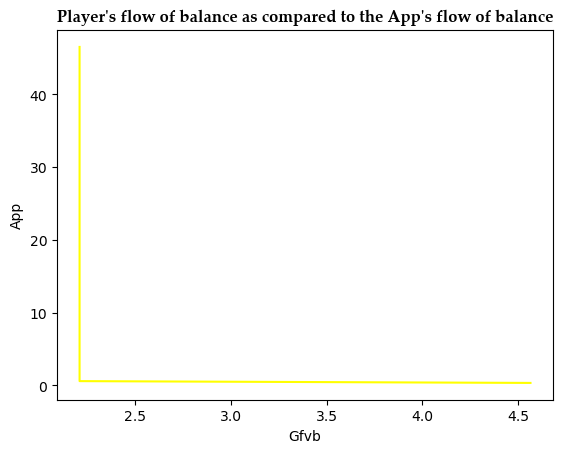

In [47]:
font1 = {'size':12, 'family':'Palatino Linotype', 'weight':'bold'}
matches_df.plot(x=random.choice(matches_df.columns.values[12:]), legend=False, y='Total Amount Earned by App', kind='line',  color=random.choice(['r','g','b','yellow','black','orange','indigo']))
plt.title("Player's flow of balance as compared to the App's flow of balance", fontdict=font1)
plt.ylabel("App")

#Change value from 12 to any greater int value within the length of columns.values to get similar visualizations for other players

In [58]:
df = pd.read_csv(r"D:\DSP and ML files\CSV\Rummy 4 Player 0.5.csv")
#Save the csv file in local storage and access it in the above code

In [59]:
df.head()

,Match Number,Total Amount Earned by App,Losing Players Balance 1,Losing Players Balance 2,Losing Players Balance 3,Winning Player Balance,Amount to be Credited to App
0,86,29.642,5.412,3.554,2.172,21.407,0.570
1,96,30.625,5.921,1.342,3.706,37.562,0.360
2,193,59.883,3.507,2.485,1.424,31.038,0.382
3,145,42.600,2.030,2.736,6.647,38.266,0.412
4,190,59.261,3.930,5.232,5.442,19.106,0.495


In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Match Number,55.0,112.272727,50.046443,16.000,74.0000,111.000,152.5000,207.000
Total Amount Earned by App,55.0,34.199164,15.055405,4.905,22.7765,35.084,44.3080,65.040
Losing Players Balance 1,55.0,4.013018,1.590804,0.562,2.9155,3.635,5.2255,7.308
Losing Players Balance 2,55.0,3.768982,1.842975,0.851,2.4505,3.554,4.7860,7.626
Losing Players Balance 3,55.0,3.514891,1.703922,0.597,2.1755,3.487,4.4580,7.487
Winning Player Balance,55.0,33.897400,9.613877,18.697,26.1080,34.789,39.0185,65.902
Amount to be Credited to App,55.0,0.404364,0.146301,0.022,0.2960,0.412,0.5470,0.593


<Axes: >

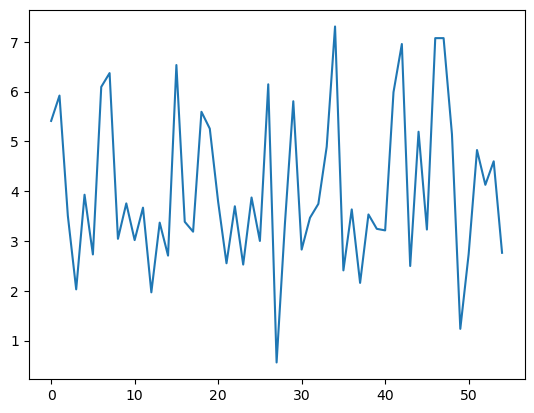

In [61]:
df['Losing Players Balance 1'].plot(kind='line')

In [62]:
df['Total Money Involved in each pool'] = df[['Losing Players Balance 1', 'Losing Players Balance 2', 'Losing Players Balance 3', 'Winning Player Balance', 'Total Amount Earned by App']].sum(axis=1)

In [63]:
df.columns

Index(['Match Number', 'Total Amount Earned by App',
       'Losing Players Balance 1', 'Losing Players Balance 2',
       'Losing Players Balance 3', 'Winning Player Balance',
       'Amount to be Credited to App', 'Total Money Involved in each pool'],
      dtype='object')

In [64]:
df.head()

,Match Number,Total Amount Earned by App,Losing Players Balance 1,Losing Players Balance 2,Losing Players Balance 3,Winning Player Balance,Amount to be Credited to App,Total Money Involved in each pool
0,86,29.642,5.412,3.554,2.172,21.407,0.570,62.187
1,96,30.625,5.921,1.342,3.706,37.562,0.360,79.156
2,193,59.883,3.507,2.485,1.424,31.038,0.382,98.337
3,145,42.600,2.030,2.736,6.647,38.266,0.412,92.279
4,190,59.261,3.930,5.232,5.442,19.106,0.495,92.971


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(<seaborn.axisgrid.FacetGrid at 0x1a014f0d710>,
 <seaborn.axisgrid.FacetGrid at 0x1a014fdea90>)

<Figure size 500x500 with 0 Axes>

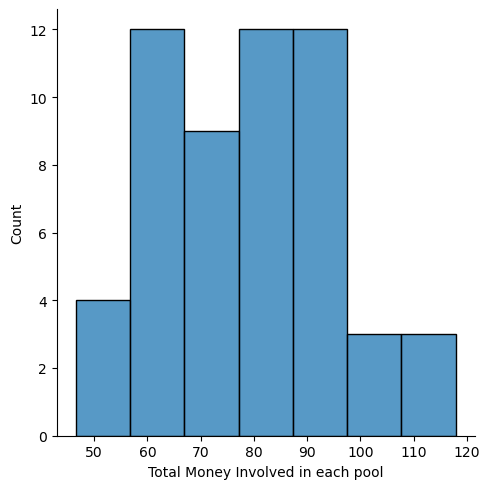

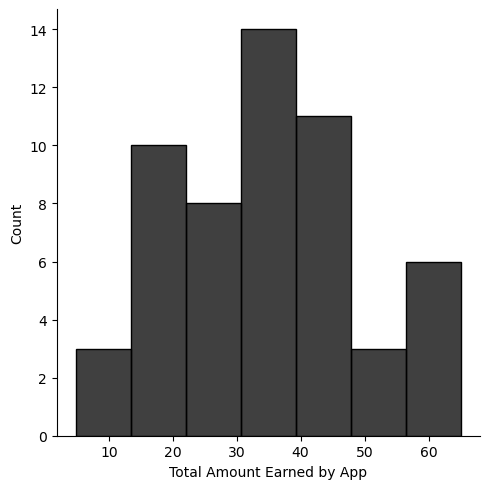

In [67]:
plt.figure(figsize=(5,5))

sns.displot(data=df, x='Total Money Involved in each pool'), sns.displot(data=df, x='Total Amount Earned by App', color='black')